#### data load 

In [19]:
import pandas as pd
df = pd.read_csv('./data/spi10_nrs.csv')

del df['id']

df['10min'] = df['10min'].map(float)
df['20min'] = df['20min'].map(float)
df['30min'] = df['30min'].map(float)
df['40min'] = df['40min'].map(float)
df['50min'] = df['50min'].map(float)

In [31]:
df.head()

,10min,20min,30min,40min,50min,pacu_nrs
0,31.343456,40.256847,31.299619,21.607090,26.093693,0
1,14.132278,22.655304,25.930903,15.841591,19.367579,3
2,25.943084,40.514743,46.133591,42.573146,38.576251,0
3,31.179626,39.087832,34.023053,32.053987,22.431271,0
4,33.995284,28.575496,27.641563,19.640487,28.559321,3


In [21]:
df.describe()

,10min,20min,30min,40min,50min,pacu_nrs
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,28.968211,32.536516,32.670698,30.799905,28.946090,2.122807
std,9.485069,9.268715,10.719564,11.387758,10.545130,2.335340
min,10.813229,10.611068,9.794115,10.577235,7.779118,0.000000
25%,21.765545,26.626627,25.805066,21.212372,20.880326,0.000000
50%,27.644981,31.337603,31.530647,29.744435,28.397784,2.000000
75%,34.400889,38.886692,40.354390,38.053381,36.175619,3.000000
max,57.202422,59.644750,57.435509,60.198842,54.907149,10.000000


In [37]:
df['pacu_nrs'].value_counts()

0     44
3     27
2     13
1     10
5      5
6      5
7      4
8      3
4      2
10     1
Name: pacu_nrs, dtype: int64

<AxesSubplot:>

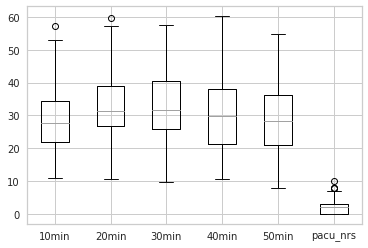

In [27]:
df.boxplot( )

#### nrs hist 

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb239c77f90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb239cc9650>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb239c77dd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb239cc9d10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb239e2e090>],
 'means': []}

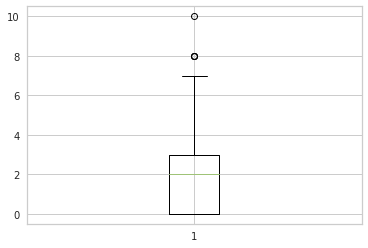

In [32]:
import matplotlib.pyplot as plt
plt.boxplot(df['pacu_nrs'])

(array([94.,  7., 13.]),
 array([ 0,  4,  6, 11]),
 <BarContainer object of 3 artists>)

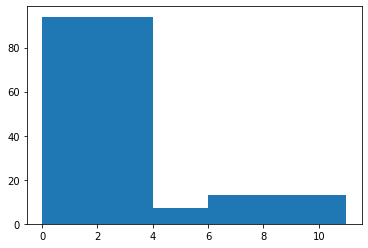

In [94]:
from matplotlib import pyplot as plt
plt.hist(df['pacu_nrs'],bins=[0,4,6,11])

(array([94., 20.]), array([ 0,  4, 11]), <BarContainer object of 2 artists>)

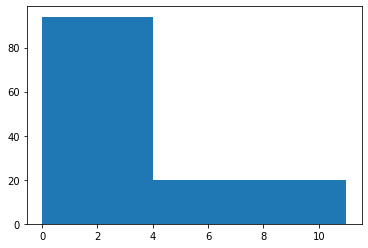

In [95]:
from matplotlib import pyplot as plt
plt.hist(df['pacu_nrs'],bins=[0,4,11])

(array([44., 10., 13., 27.,  2.,  5.,  5.,  4.,  3.,  1.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

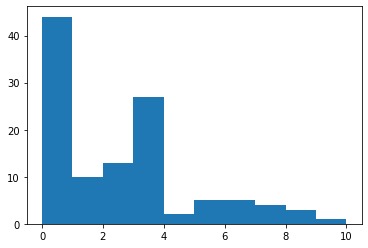

In [91]:
from matplotlib import pyplot as plt
plt.hist(df['pacu_nrs'])

/home/ubuntu/anaconda3/envs/p37/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pacu_nrs', ylabel='Density'>

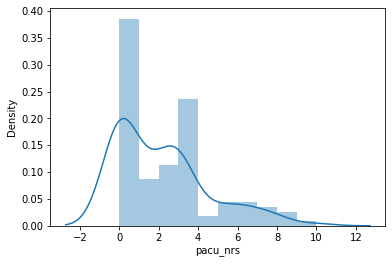

In [15]:
import seaborn as sns
sns.distplot(df['pacu_nrs'],bins=10,)

In [17]:
import numpy as np

In [73]:
colors = list(mcolors.BASE_COLORS.keys())

colors = colors+ ['black']*3

In [89]:
def nrs2color(x):
    color = ''
    if x in [0,1,2,3]:
        color = 'g'
    elif x in [4,5]:
        color = 'b'
    else:
        color = 'r'
    return color

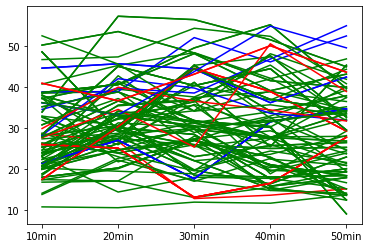

In [97]:
import random 
k = 114
indices = random.choices(list(range(114)), k=k)

for i in indices:
    x = df.iloc[i][:5]
    y = int(df.iloc[i][5])
    
    plt.plot(x,color=nrs2color(y) )

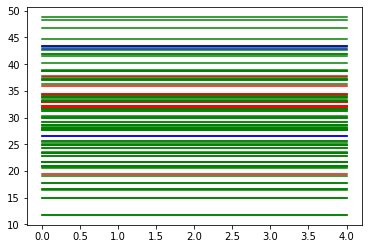

In [102]:
import random 
k = 114
indices = random.choices(list(range(114)), k=k)

for i in indices:
    x = df.iloc[i][:5]
    y = int(df.iloc[i][5])
    x = [np.mean(x)]
    plt.plot(x*5,color=nrs2color(y) )

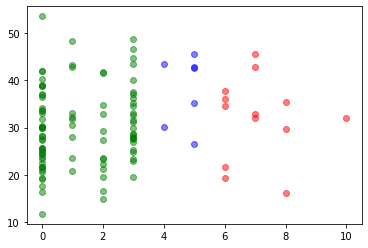

In [113]:
import random 
k = 114
indices = random.choices(list(range(114)), k=k)
indices = list(range(114))

for i in indices:
    x = df.iloc[i][:5]
    y = int(df.iloc[i][5])
    x_mean = [np.mean(x)]
    
    plt.scatter(y,x_mean,color=nrs2color(y),alpha=0.5 )

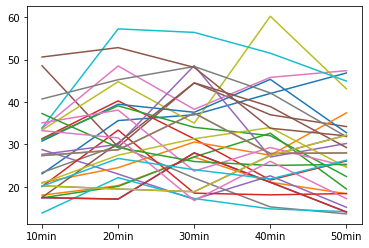

In [66]:
import random 
k = 30
indices = random.choices(list(range(114)), k=k)

for i in indices:
    x = df.iloc[i][:5]
    y = df.iloc[i][5]
    plt.plot(x)

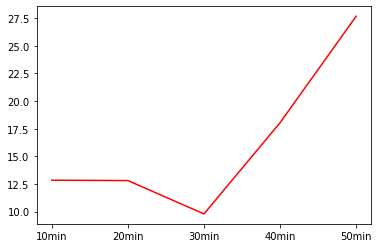

In [40]:
plt.plot(x,color='red')

#### Diverse ML 

In [8]:
from pycaret.regression import *
exp_name = setup(data = df,  target = 'pacu_nrs', log_experiment = True)
best = compare_models(n_select=3)
exp_logs = get_logs()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,1.8055,5.3602,2.2317,-0.1691,0.7867,0.5114,0.0060
lasso,Lasso Regression,1.7948,5.3780,2.2311,-0.1764,0.7856,0.5217,0.0060
en,Elastic Net,1.7894,5.4769,2.2504,-0.2000,0.7887,0.5157,0.0070
huber,Huber Regressor,1.7663,5.6815,2.2852,-0.2051,0.7657,0.5279,0.0090
dummy,Dummy Regressor,1.8817,5.5367,2.2792,-0.2356,0.8086,0.5043,0.0060
llar,Lasso Least Angle Regression,1.8817,5.5367,2.2792,-0.2356,0.8086,0.5043,0.0060
ridge,Ridge Regression,1.8015,5.6587,2.2851,-0.2359,0.7979,0.5184,0.0070
lr,Linear Regression,1.8015,5.6590,2.2852,-0.2360,0.7979,0.5184,0.0060
lar,Least Angle Regression,1.8015,5.6590,2.2852,-0.2360,0.7979,0.5184,0.0070
omp,Orthogonal Matching Pursuit,1.8422,5.4694,2.2581,-0.2401,0.7902,0.5839,0.0050


##### 0~10 (11 class) 

In [38]:
44/114

0.38596491228070173

In [12]:
44/114

0.38596491228070173

In [10]:
from pycaret.classification import *
exp_name = setup(data = df,  target = 'pacu_nrs', log_experiment = True,normalize=True)
models = compare_models(n_select=3)
exp_logs = get_logs()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.3536,0.0000,0.2210,0.2331,0.2504,0.0897,0.1380,0.0040
rf,Random Forest Classifier,0.3411,0.0000,0.2475,0.2602,0.2799,0.1235,0.1382,0.1160
knn,K Neighbors Classifier,0.3286,0.0000,0.2140,0.2500,0.2680,0.0935,0.1004,0.0250
dt,Decision Tree Classifier,0.3268,0.0000,0.3021,0.2963,0.2868,0.1666,0.1832,0.0040
lr,Logistic Regression,0.3161,0.0000,0.1910,0.2262,0.2318,0.0474,0.0867,0.0060
ada,Ada Boost Classifier,0.3161,0.0000,0.2023,0.2188,0.2380,0.0861,0.1025,0.0170
lda,Linear Discriminant Analysis,0.3161,0.0000,0.1782,0.2332,0.2437,0.0707,0.0915,0.0040
dummy,Dummy Classifier,0.3161,0.0000,0.1867,0.1035,0.1550,0.0000,0.0000,0.0030
et,Extra Trees Classifier,0.3036,0.0000,0.2109,0.2457,0.2537,0.0846,0.0954,0.1030
nb,Naive Bayes,0.2768,0.0000,0.1562,0.2141,0.2283,0.0517,0.0600,0.0040


#####  no-pain(0-3), moderate(4-5), severe(6-10)

In [14]:
def nrs2class(x,pain_type=3):
    pain = ''
    
    if pain_type == 3:
        if x in [0,1,2,3]:
            pain = 'no'
        elif x in [4,5]:
            pain = 'moderate'
        else:
            pain = 'severe'
    elif pain_type == 2:
        if x in [0,1,2,3]:
            pain = 'no'
        else:
            pain = 'moderate-severe'
    return pain

df['pacu_nrs'] = df.pacu_nrs.map(nrs2class)

In [24]:
from pycaret.classification import *
exp_name = setup(data = df,  target = 'pacu_nrs', log_experiment = True,normalize=True)
models = compare_models(n_select=3)
exp_logs = get_logs()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8357,0.0000,0.8000,0.7795,0.8452,0.0000,0.0000,0.2200
et,Extra Trees Classifier,0.8357,0.2330,0.8000,0.7795,0.8452,0.0000,0.0000,0.3280
dummy,Dummy Classifier,0.8357,0.1500,0.8000,0.7795,0.8452,0.0000,0.0000,0.0040
knn,K Neighbors Classifier,0.8232,0.1960,0.7857,0.7777,0.8375,-0.0143,-0.0143,0.2420
rf,Random Forest Classifier,0.8232,0.2080,0.7944,0.7768,0.8386,-0.0143,-0.0157,0.2750
lightgbm,Light Gradient Boosting Machine,0.7964,0.2214,0.7913,0.7940,0.8333,0.0152,0.0180,0.1740


In [26]:
models

[RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                 max_iter=None, normalize=False, random_state=3512,
                 solver='auto', tol=0.001),
 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=3512, verbose=0,
                      warm_start=False),
 DummyClassifier(constant=None, random_state=3512, strategy='prior')]

#####  no-pain(0-3), moderate-severe(4-10)

In [27]:
def nrs2class(x,pain_type=2):
    pain = ''
    
    if pain_type == 3:
        if x in [0,1,2,3]:
            pain = 'no'
        elif x in [4,5]:
            pain = 'moderate'
        else:
            pain = 'severe'
    elif pain_type == 2:
        if x in [0,1,2,3]:
            pain = 'no'
        else:
            pain = 'moderate-severe'
    return pain
from pycaret.classification import *
exp_name = setup(data = df,  target = 'pacu_nrs', log_experiment = True,normalize=True)
models = compare_models(n_select=3)
exp_logs = get_logs()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8250,0.3830,0.6333,0.7286,0.7881,nan,0.0943,0.2260
ridge,Ridge Classifier,0.8125,0.0000,0.6000,0.7000,0.7657,nan,0.0000,0.1660
et,Extra Trees Classifier,0.8125,0.4228,0.6278,0.7348,0.7863,nan,0.0909,0.3220
dummy,Dummy Classifier,0.8125,0.3000,0.6000,0.7000,0.7657,nan,0.0000,0.0030
knn,K Neighbors Classifier,0.8000,0.4018,0.6222,0.7152,0.7700,nan,0.0367,0.1890
svm,SVM - Linear Kernel,0.8000,0.0000,0.6222,0.7348,0.7804,nan,0.1005,0.2270
rf,Random Forest Classifier,0.8000,0.4179,0.5944,0.7054,0.7641,nan,0.0105,0.1090
lightgbm,Light Gradient Boosting Machine,0.7500,0.3429,0.5460,0.6878,0.7274,nan,-0.0601,0.2130


/home/ubuntu/anaconda3/envs/p37/lib/python3.7/site-packages/sklearn/metrics/_classification.py:620: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
/home/ubuntu/anaconda3/envs/p37/lib/python3.7/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/ubuntu/anaconda3/envs/p37/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/envs/p37/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

#### Tune model 

In [3]:
# it uses 3-class
def nrs2class(x,pain_type=3):
    pain = ''
    
    if pain_type == 3:
        if x in [0,1,2,3]:
            pain = 'no'
        elif x in [4,5]:
            pain = 'moderate'
        else:
            pain = 'severe'
    elif pain_type == 2:
        if x in [0,1,2,3]:
            pain = 'no'
        else:
            pain = 'moderate-severe'
    return pain

df['pacu_nrs'] = df.pacu_nrs.map(nrs2class)

In [36]:
df.pacu_nrs.value_counts()

no          94
severe      13
moderate     7
Name: pacu_nrs, dtype: int64

In [4]:
from pycaret.classification import *
exp_name = setup(data = df,  target = 'pacu_nrs', log_experiment = True,normalize=True)
mds = compare_models(n_select=3)
exp_logs = get_logs()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8607,0.0571,0.9333,0.8420,0.9033,0.0000,0.0000,0.2370
knn,K Neighbors Classifier,0.8607,0.0759,0.9333,0.8420,0.9033,0.0000,0.0000,0.1930
ridge,Ridge Classifier,0.8607,0.0000,0.9333,0.8420,0.9033,0.0000,0.0000,0.2160
dummy,Dummy Classifier,0.8607,0.0500,0.9333,0.8420,0.9033,0.0000,0.0000,0.2310
rf,Random Forest Classifier,0.8482,0.0750,0.9190,0.8402,0.8956,-0.0143,-0.0143,0.2670
gbc,Gradient Boosting Classifier,0.8482,0.0857,0.9381,0.8589,0.9055,0.0333,0.0396,0.2570


In [5]:
best = mds[0]

In [6]:
tuned_best = tune_model(best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8750,0.0000,1.0000,0.8750,0.9333,0.0000,0.0000
1,0.8750,0.0000,1.0000,0.8750,0.9333,0.0000,0.0000
2,0.8750,0.0000,1.0000,0.8750,0.9333,0.0000,0.0000
3,0.8750,0.0000,1.0000,0.8750,0.9333,0.0000,0.0000
4,0.8750,0.0000,1.0000,0.8750,0.9333,0.0000,0.0000
5,0.8750,0.0000,1.0000,0.8750,0.9333,0.0000,0.0000
6,0.8750,0.0000,1.0000,0.8750,0.9333,0.0000,0.0000
7,0.8750,0.0000,1.0000,0.8750,0.9333,0.0000,0.0000
8,0.7500,0.5714,0.3333,0.5625,0.6429,0.0000,0.0000


In [7]:
tuned_best1 = tune_model(mds[1])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8750,0.0000,1.0000,0.8750,0.9333,0.0000,0.0000
1,0.8750,0.0000,1.0000,0.8750,0.9333,0.0000,0.0000
2,0.8750,0.0000,1.0000,0.8750,0.9333,0.0000,0.0000
3,0.8750,0.0000,1.0000,0.8750,0.9333,0.0000,0.0000
4,0.8750,0.0000,1.0000,0.8750,0.9333,0.0000,0.0000
5,0.8750,0.0000,1.0000,0.8750,0.9333,0.0000,0.0000
6,0.8750,0.0000,1.0000,0.8750,0.9333,0.0000,0.0000
7,0.8750,0.0000,1.0000,0.8750,0.9333,0.0000,0.0000
8,0.7500,0.7232,0.3333,0.5625,0.6429,0.0000,0.0000


In [49]:
tuned_best2 = tune_model(mds[2])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8750,0.0000,1.0000,0.8750,0.9333,0.0000,0.0000
1,0.8750,0.0000,1.0000,0.8750,0.9333,0.0000,0.0000
2,0.8750,0.0000,1.0000,0.8750,0.9333,0.0000,0.0000
3,0.8750,0.0000,1.0000,0.8750,0.9333,0.0000,0.0000
4,0.7500,0.0000,0.3333,0.5625,0.6429,0.0000,0.0000
5,0.7500,0.0000,0.3333,0.5625,0.6429,0.0000,0.0000
6,0.7500,0.0000,0.3333,0.5625,0.6429,0.0000,0.0000
7,0.7500,0.0000,0.3333,0.5625,0.6429,0.0000,0.0000
8,0.7500,0.0000,0.3333,0.5625,0.6429,0.0000,0.0000


In [8]:
tuned_best

LogisticRegression(C=1.267, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=8478, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
md = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8750,0.0000,1.0000,0.8750,0.9333,0.0000,0.0000
1,0.8750,0.0000,1.0000,0.8750,0.9333,0.0000,0.0000
2,0.8750,0.0000,1.0000,0.8750,0.9333,0.0000,0.0000
3,0.8750,0.0000,1.0000,0.8750,0.9333,0.0000,0.0000
4,0.8750,0.0000,1.0000,0.8750,0.9333,0.0000,0.0000
5,0.8750,0.0000,1.0000,0.8750,0.9333,0.0000,0.0000
6,0.8750,0.0000,1.0000,0.8750,0.9333,0.0000,0.0000
7,0.8750,0.0000,1.0000,0.8750,0.9333,0.0000,0.0000
8,0.7500,0.5714,0.3333,0.5625,0.6429,0.0000,0.0000


In [17]:
tuned_md = tune_model(md,search_algorithm='bayesian',search_library='scikit-optimize')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8750,0.0000,1.0000,0.8750,0.9333,0.0000,0.0000
1,0.8750,0.0000,1.0000,0.8750,0.9333,0.0000,0.0000
2,0.8750,0.0000,1.0000,0.8750,0.9333,0.0000,0.0000
3,0.8750,0.0000,1.0000,0.8750,0.9333,0.0000,0.0000
4,0.8750,0.0000,1.0000,0.8750,0.9333,0.0000,0.0000
5,0.8750,0.0000,1.0000,0.8750,0.9333,0.0000,0.0000
6,0.8750,0.0000,1.0000,0.8750,0.9333,0.0000,0.0000
7,0.8750,0.0000,1.0000,0.8750,0.9333,0.0000,0.0000
8,0.7500,0.4464,0.3333,0.5625,0.6429,0.0000,0.0000


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


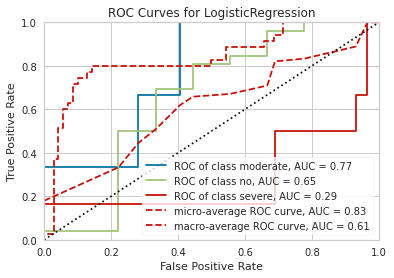

In [18]:
plot_model(tuned_md, plot = 'auc')

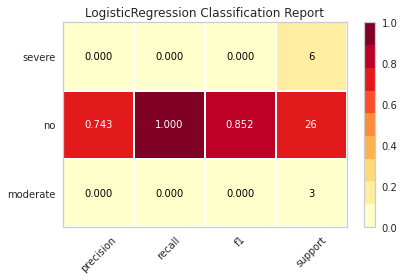

In [19]:
plot_model(tuned_md, plot = 'class_report')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


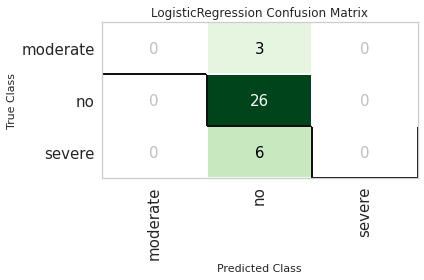

In [22]:
plot_model(tuned_md, plot = 'confusion_matrix')

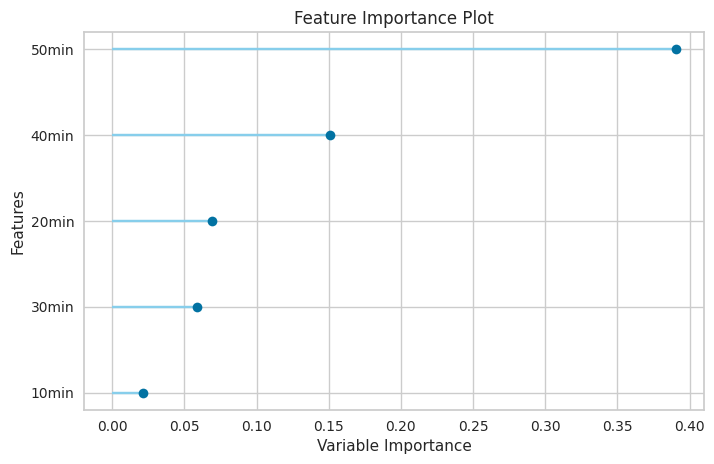

In [25]:
plot_model(tuned_md, plot='feature')

In [27]:
evaluate_model(tuned_md)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [29]:
predict_model(tuned_md)



In [28]:
# saved_model(tuned_md)
# saved_final_rf = load_model('Final RF Model 11Nov2020')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7429,0,0.3333,0.5518,0.6333,0.0000,0.0000


,10min,20min,30min,40min,50min,pacu_nrs,Label,Score
0,1.674594,0.462865,-0.085013,-0.331931,-0.609277,severe,no,0.9185
1,-0.645989,-2.060080,-1.400812,-1.155215,-1.342185,no,no,0.9150
2,-0.622657,1.042768,-0.297793,-1.408097,-1.062692,no,no,0.8910
3,0.382879,0.210824,2.313980,1.713169,2.239435,severe,no,0.7639
4,0.725495,0.003713,-0.235467,0.037000,0.547348,no,no,0.8598
5,-1.902611,-2.478327,-1.972775,-1.677327,-1.488395,no,no,0.8939
6,-1.220506,-1.437422,-0.546569,0.129771,-0.913602,no,no,0.8850
7,0.609548,0.532677,-0.863305,-0.161188,-0.381263,no,no,0.8566
8,-0.879168,-0.513335,-0.280857,-0.900885,-1.193942,no,no,0.9114
9,1.214099,0.376058,0.972545,1.633224,1.485415,severe,no,0.8010


#### end2end (3  class)

In [1]:
# preprocess
import pandas as pd
df = pd.read_csv('./data/spi10_nrs.csv')

del df['id']

df['10min'] = df['10min'].map(float)
df['20min'] = df['20min'].map(float)
df['30min'] = df['30min'].map(float)
df['40min'] = df['40min'].map(float)
df['50min'] = df['50min'].map(float)

def nrs2class(x,pain_type=3):
    pain = ''
    
    if pain_type == 3:
        if x in [0,1,2,3]:
            pain = 'no'
        elif x in [4,5]:
            pain = 'moderate'
        else:
            pain = 'severe'
    elif pain_type == 2:
        if x in [0,1,2,3]:
            pain = 'no'
        else:
            pain = 'moderate-severe'
    return pain

df['pacu_nrs'] = df.pacu_nrs.map(nrs2class)

In [4]:
from pycaret.classification import *
exp_name = setup(data = df,  target = 'pacu_nrs', log_experiment = True,normalize=True)
best = compare_models(n_select=3)
exp_logs = get_logs()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8357,0.0000,0.8000,0.7795,0.8452,0.0000,0.0000,0.2180
et,Extra Trees Classifier,0.8357,0.2420,0.8000,0.7795,0.8452,0.0000,0.0000,0.3050
dummy,Dummy Classifier,0.8357,0.1500,0.8000,0.7795,0.8452,0.0000,0.0000,0.2180
knn,K Neighbors Classifier,0.8232,0.1969,0.7857,0.7777,0.8375,-0.0143,-0.0143,0.0270
lr,Logistic Regression,0.8107,0.2188,0.7714,0.7753,0.8288,-0.0200,-0.0218,0.1720
ada,Ada Boost Classifier,0.6839,0.1656,0.5944,0.8374,0.7367,0.1202,0.1643,0.2220


In [5]:
rg = create_model('ridge')

tuned_rg = tune_model(rg)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8750,0.0000,1.0000,0.8750,0.9333,0.0000,0.0000
1,0.8750,0.0000,1.0000,0.8750,0.9333,0.0000,0.0000
2,0.8750,0.0000,1.0000,0.8750,0.9333,0.0000,0.0000
3,0.8750,0.0000,1.0000,0.8750,0.9333,0.0000,0.0000
4,0.8750,0.0000,1.0000,0.8750,0.9333,0.0000,0.0000
5,0.8750,0.0000,1.0000,0.8750,0.9333,0.0000,0.0000
6,0.7500,0.0000,0.3333,0.5625,0.6429,0.0000,0.0000
7,0.7500,0.0000,0.3333,0.5625,0.6429,0.0000,0.0000
8,0.7500,0.0000,0.3333,0.5625,0.6429,0.0000,0.0000


In [6]:
# plot_model
evaluate_model(tuned_rg)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [7]:
predict_model(tuned_rg)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.8000,0,0.3333,0.6400,0.7111,0.0000,0.0000


,10min,20min,30min,40min,50min,pacu_nrs,Label
0,1.904123,1.710965,1.265283,0.563695,1.453816,moderate,no
1,-0.213151,-0.939418,-0.490503,-1.352387,-0.958041,no,no
2,0.197672,1.015216,0.462706,0.399258,0.399350,severe,no
3,-0.778780,-0.560871,-1.478335,0.128231,0.693104,moderate,no
4,-0.472729,-0.519161,1.375277,0.208124,0.741099,no,no
5,2.362079,-0.272721,1.277888,0.639851,0.643936,no,no
6,0.070255,0.266976,-0.811925,-0.270916,0.102606,no,no
7,0.424859,0.638365,0.968000,0.612779,1.385563,severe,no
8,2.145295,1.914676,2.285898,2.084752,1.293352,no,no
9,-0.921207,-1.482584,-1.353762,-0.262242,0.444371,no,no


In [11]:
exp_name

('clf-default-name',
         10min     20min     30min     40min     50min
 94   0.438385 -0.949157 -1.277414  0.152219  0.598751
 24   1.045543  1.139468 -0.033653 -0.002800 -1.490900
 100 -1.237550 -0.157485  1.280606  0.821380  0.158363
 61  -0.409141  1.191860  0.216553  0.832458  0.672820
 33  -0.250883 -0.797355 -1.940938 -1.284880  0.011527
 ..        ...       ...       ...       ...       ...
 10  -1.779759 -2.297540 -2.284415 -1.143383  0.002021
 40  -1.181654  0.833331  0.642911  0.467804  0.057422
 105 -0.934481 -0.659181 -0.238180 -0.237028 -1.367044
 30  -1.317422 -1.774718 -1.947048 -1.373502 -1.496696
 74   0.812655  0.874026 -0.017869 -0.231639  0.576208
 
 [79 rows x 5 columns],
 None,
 94     1
 24     1
 100    2
 61     1
 33     2
       ..
 10     2
 40     1
 105    1
 30     1
 74     1
 Name: pacu_nrs, Length: 79, dtype: int64,
 False,
         10min     20min     30min     40min     50min
 16   1.904123  1.710965  1.265283  0.563695  1.453816
 48  -0.213151 

/home/ubuntu/anaconda3/envs/p37/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: The outputs_2d_ attribute is deprecated in version 0.22 and will be removed in version 0.24. It is equivalent to n_outputs_ > 1.
  warnings.warn(msg, category=FutureWarning)
/home/ubuntu/anaconda3/envs/p37/lib/python3.7/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/ubuntu/anaconda3/envs/p37/lib/python3.7/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/ubuntu/anaconda3/envs/p37/lib/python3.7/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/ubuntu/anaconda3/envs/p37/lib/python3.7/site-packages/sklearn/metrics/_classification.p

#### end2end (2 class)

In [17]:
# preprocess
import pandas as pd
df = pd.read_csv('./data/spi10_nrs.csv')

del df['id']

df['10min'] = df['10min'].map(float)
df['20min'] = df['20min'].map(float)
df['30min'] = df['30min'].map(float)
df['40min'] = df['40min'].map(float)
df['50min'] = df['50min'].map(float)

def nrs2class(x,pain_type=3):
    pain = ''
    
    if pain_type == 3:
        if x in [0,1,2,3]:
            pain = 'no'
        elif x in [4,5]:
            pain = 'moderate'
        else:
            pain = 'severe'
    elif pain_type == 2:
        if x in [0,1,2,3]:
            pain = 'no'
        else:
            pain = 'moderate-severe'
    return pain

In [18]:
df['pacu_nrs'] = df.pacu_nrs.map(lambda x: nrs2class(x,2))

In [19]:
from pycaret.classification import *
exp_name = setup(data = df,  target = 'pacu_nrs', log_experiment = True,normalize=True)

,Description,Value
0,session_id,3750
1,Target,pacu_nrs
2,Target Type,Binary
3,Label Encoded,"moderate-severe: 0, no: 1"
4,Original Data,"(114, 6)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [20]:
best = compare_models(n_select=3)
exp_logs = get_logs()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8607,0.4940,1.0000,0.8607,0.9247,0.0000,0.0000,0.2510
knn,K Neighbors Classifier,0.8607,0.4607,1.0000,0.8607,0.9247,0.0000,0.0000,0.2010
ridge,Ridge Classifier,0.8607,0.0000,1.0000,0.8607,0.9247,0.0000,0.0000,0.0050
et,Extra Trees Classifier,0.8607,0.5976,1.0000,0.8607,0.9247,0.0000,0.0000,0.1060
dummy,Dummy Classifier,0.8607,0.5000,1.0000,0.8607,0.9247,0.0000,0.0000,0.0040
lda,Linear Discriminant Analysis,0.8482,0.4631,0.9857,0.8589,0.9171,-0.0143,-0.0143,0.0030
rf,Random Forest Classifier,0.8357,0.5845,0.9714,0.8571,0.9095,-0.0286,-0.0286,0.1180
gbc,Gradient Boosting Classifier,0.8339,0.6560,0.9238,0.8899,0.9037,0.1224,0.1333,0.0150
dt,Decision Tree Classifier,0.8214,0.6226,0.8952,0.9006,0.8908,0.2131,0.2259,0.0050
ada,Ada Boost Classifier,0.8107,0.5357,0.9286,0.8679,0.8918,-0.0044,0.0059,0.0170


In [26]:
clr = create_model('lr',**{'class_weight':{0:1,1:5}}) 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7500,0.7500,1.0000,0.7500,0.8571,0.0000,0.0000
1,0.8750,0.7143,1.0000,0.8750,0.9333,0.0000,0.0000
2,0.8750,0.4286,1.0000,0.8750,0.9333,0.0000,0.0000
3,0.8750,0.1429,1.0000,0.8750,0.9333,0.0000,0.0000
4,0.8750,0.1429,1.0000,0.8750,0.9333,0.0000,0.0000
5,0.8750,0.7143,1.0000,0.8750,0.9333,0.0000,0.0000
6,0.8750,0.2857,1.0000,0.8750,0.9333,0.0000,0.0000
7,0.8750,0.4286,1.0000,0.8750,0.9333,0.0000,0.0000
8,0.8750,1.0000,1.0000,0.8750,0.9333,0.0000,0.0000


In [27]:
evaluate_model(clr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [38]:
tuned_et

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=4, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0002, min_impurity_split=None,
                     min_samples_leaf=3, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=210, n_jobs=-1,
                     oob_score=False, random_state=5524, verbose=0,
                     warm_start=False)

In [28]:
et = create_model('lightgbm',**{"class_weight":{0:1,1:5}})

# tuned_et = tune_model(et,)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7500,0.5000,1.0000,0.7500,0.8571,0.0000,0.0000
1,0.8750,0.8571,1.0000,0.8750,0.9333,0.0000,0.0000
2,0.7500,0.7143,0.8571,0.8571,0.8571,-0.1429,-0.1429
3,0.8750,0.1429,1.0000,0.8750,0.9333,0.0000,0.0000
4,0.8750,0.8571,1.0000,0.8750,0.9333,0.0000,0.0000
5,0.8750,0.8571,1.0000,0.8750,0.9333,0.0000,0.0000
6,0.8750,0.5714,1.0000,0.8750,0.9333,0.0000,0.0000
7,0.8750,0.0000,1.0000,0.8750,0.9333,0.0000,0.0000
8,0.7500,0.8571,0.8571,0.8571,0.8571,-0.1429,-0.1429


In [30]:
# plot_model
evaluate_model(et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [16]:
evaluate_model(et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#### stuff 

In [14]:
from pycaret.datasets import get_data
dataset = get_data('credit')

# sample 5% of data to be used as unseen data
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)

# init setup
from pycaret.classification import *
s = setup(data = data, target = 'default', session_id=123)
# best_model = compare_models() # check
# models()
dt = create_model('dt')
tuned_dt = tune_model(dt)
# plot_model(tuned_rf, plot = 'auc')
evaluate_model(tuned_rf)
predict_model(tuned_rf)

#### simple ridge regression 

In [ ]:
from pycaret.classification import *
s = setup(data=df,target='pacu_nrs')
md = create_model('rg')
md = tuned_model(md)
evaluate_model(md)
predict_model(md, data= unseen_data)